In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from imblearn.over_sampling import SMOTE


In [33]:
# Loading the dataset
df = pd.read_csv('Manufacturing_Defect_Detection.csv')

# Data Visualization before data preprocessing

In [34]:
# first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
         X1        X2        X3        X4        X5        X6        X7  \
0  1.204110  0.201846  0.247125  0.659175 -0.300867 -0.631273 -0.070489   
1 -0.633762  0.116043  2.952224  0.979467 -0.885711  1.295048 -0.464558   
2 -1.065838  0.903341  2.217500 -0.282353 -0.922487  0.186707 -0.594496   
3 -1.744026  0.704469  0.750703  0.353785 -0.274655 -1.430687  0.310802   
4  1.368737 -1.352339 -2.168882  0.235720  0.270632  0.120212  0.509787   

         X8        X9       X10  ...       X22       X23       X24       X25  \
0  0.004892  0.218047 -0.291939  ... -0.820404  0.170194 -0.000176  0.099336   
1  0.675508  0.932822 -0.788520  ...  0.749267 -0.124995  0.249201 -0.026381   
2  0.810488  0.558529 -1.022652  ...  0.856318 -0.286116  1.070103  0.395024   
3  0.264398 -0.249862 -0.295050  ... -0.673096  0.280075  0.669255 -0.084943   
4 -0.077671  0.582654 -0.035223  ... -1.029012 -0.110548 -0.356506 -0.202722   

        X26       X27       X28     X

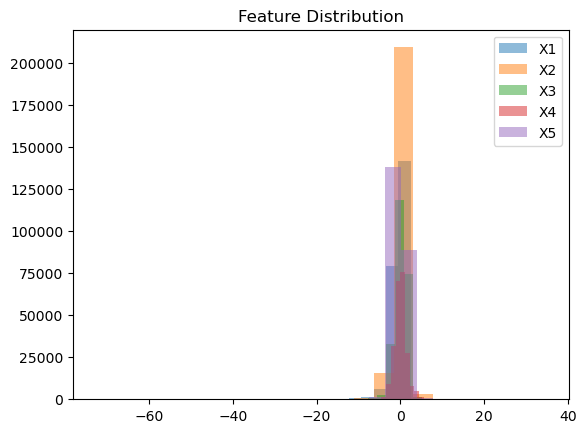

In [35]:
# Plotting histograms for selected features to analyze their distribution
for feature in ['X1', 'X2', 'X3', 'X4', 'X5']:
    plt.hist(df[feature], bins=20, alpha=0.5, label=feature)
plt.legend(loc='upper right')
plt.title('Feature Distribution')
plt.show()

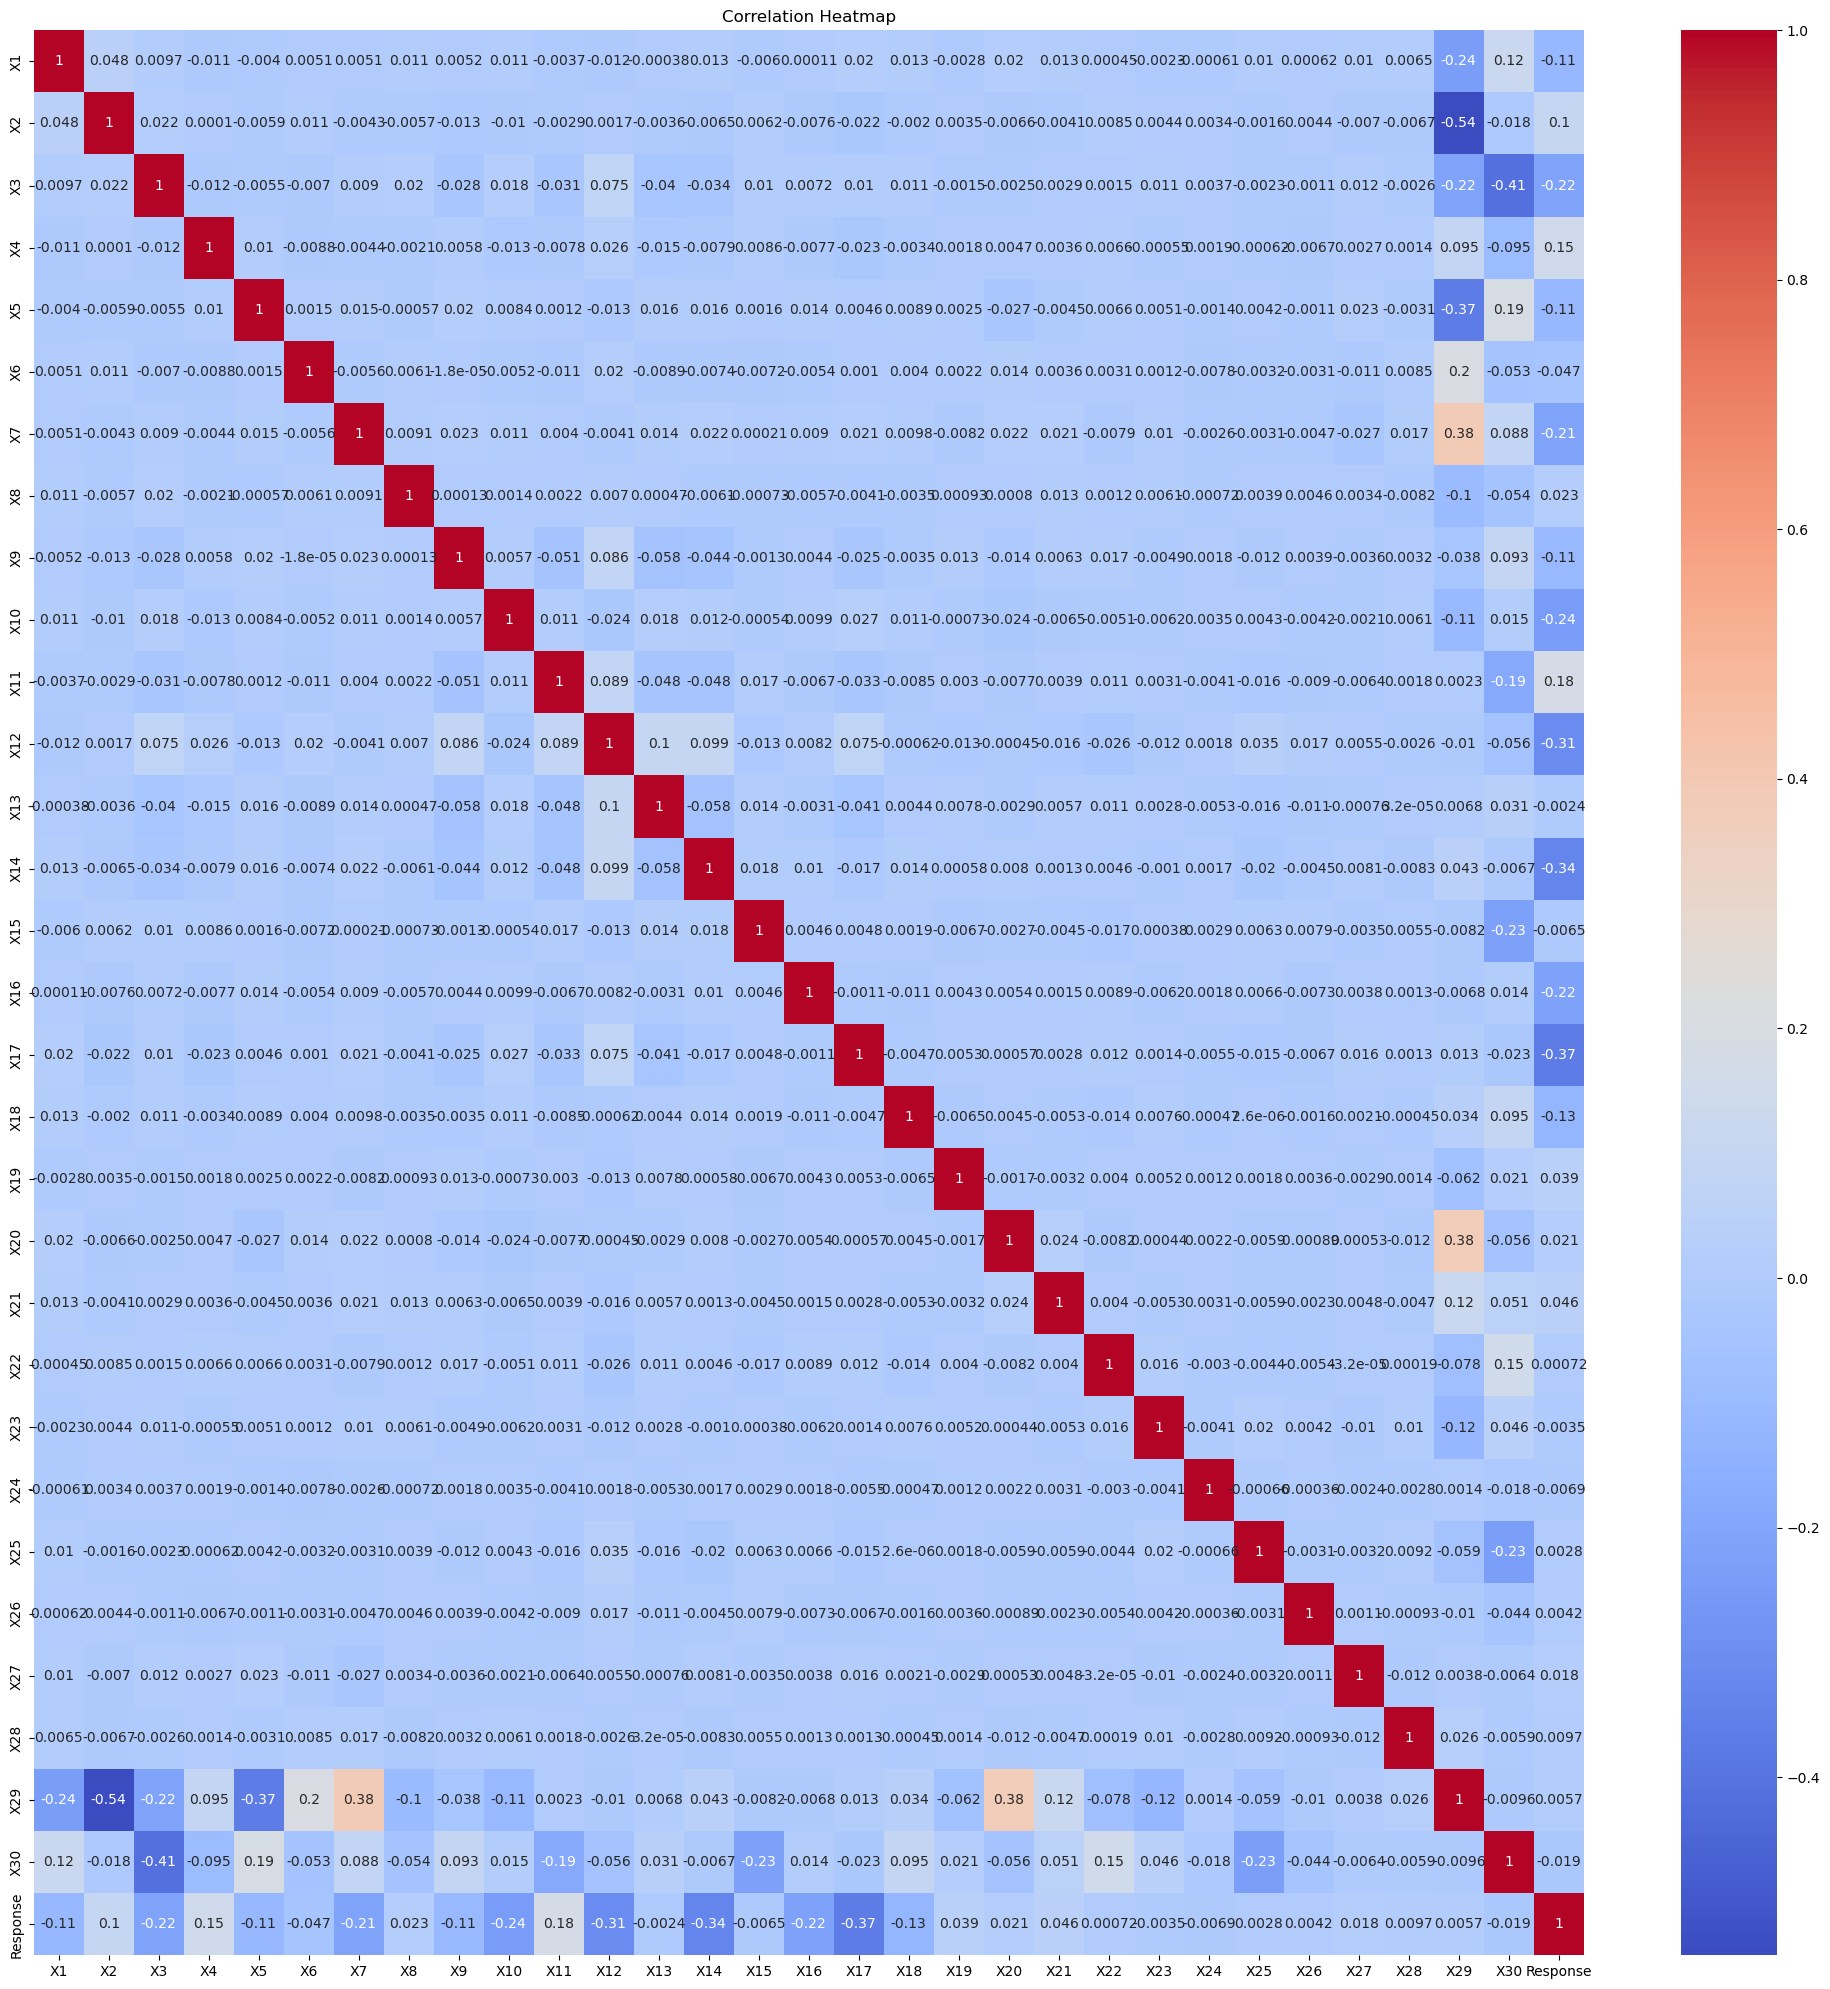

In [36]:
# correlation heatmap 

plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# visualize the skewness of each feature in a DataFrame
feature_skewness = df.drop('Response', axis=1, errors='ignore').skew()

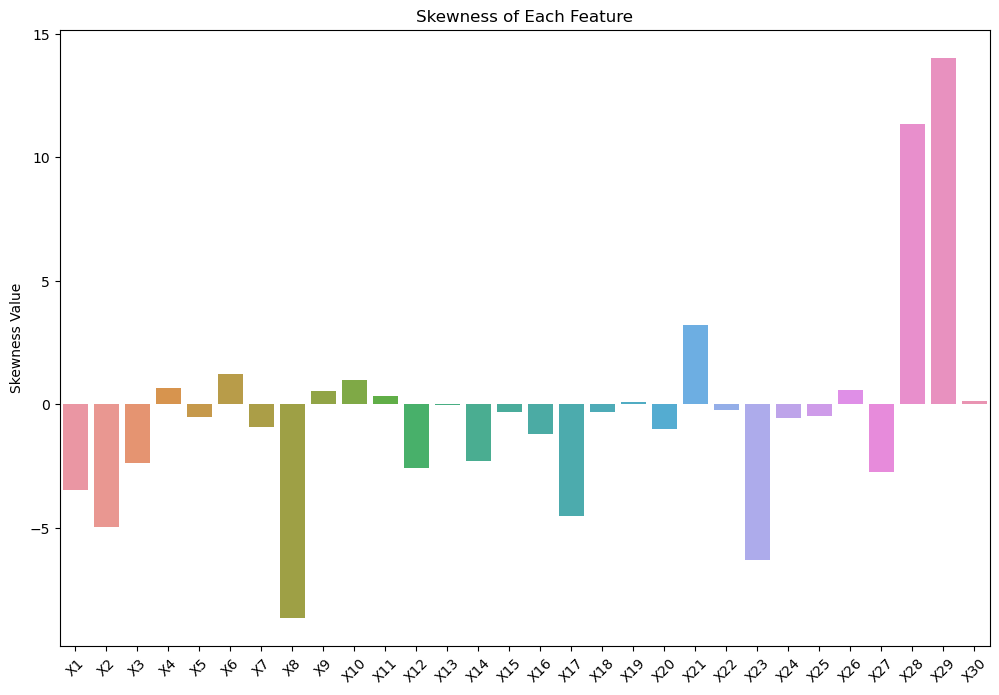

In [38]:
#bar plot for skewness values
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_skewness.index, y=feature_skewness.values)
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness Value')
plt.xticks(rotation=45)
plt.show()

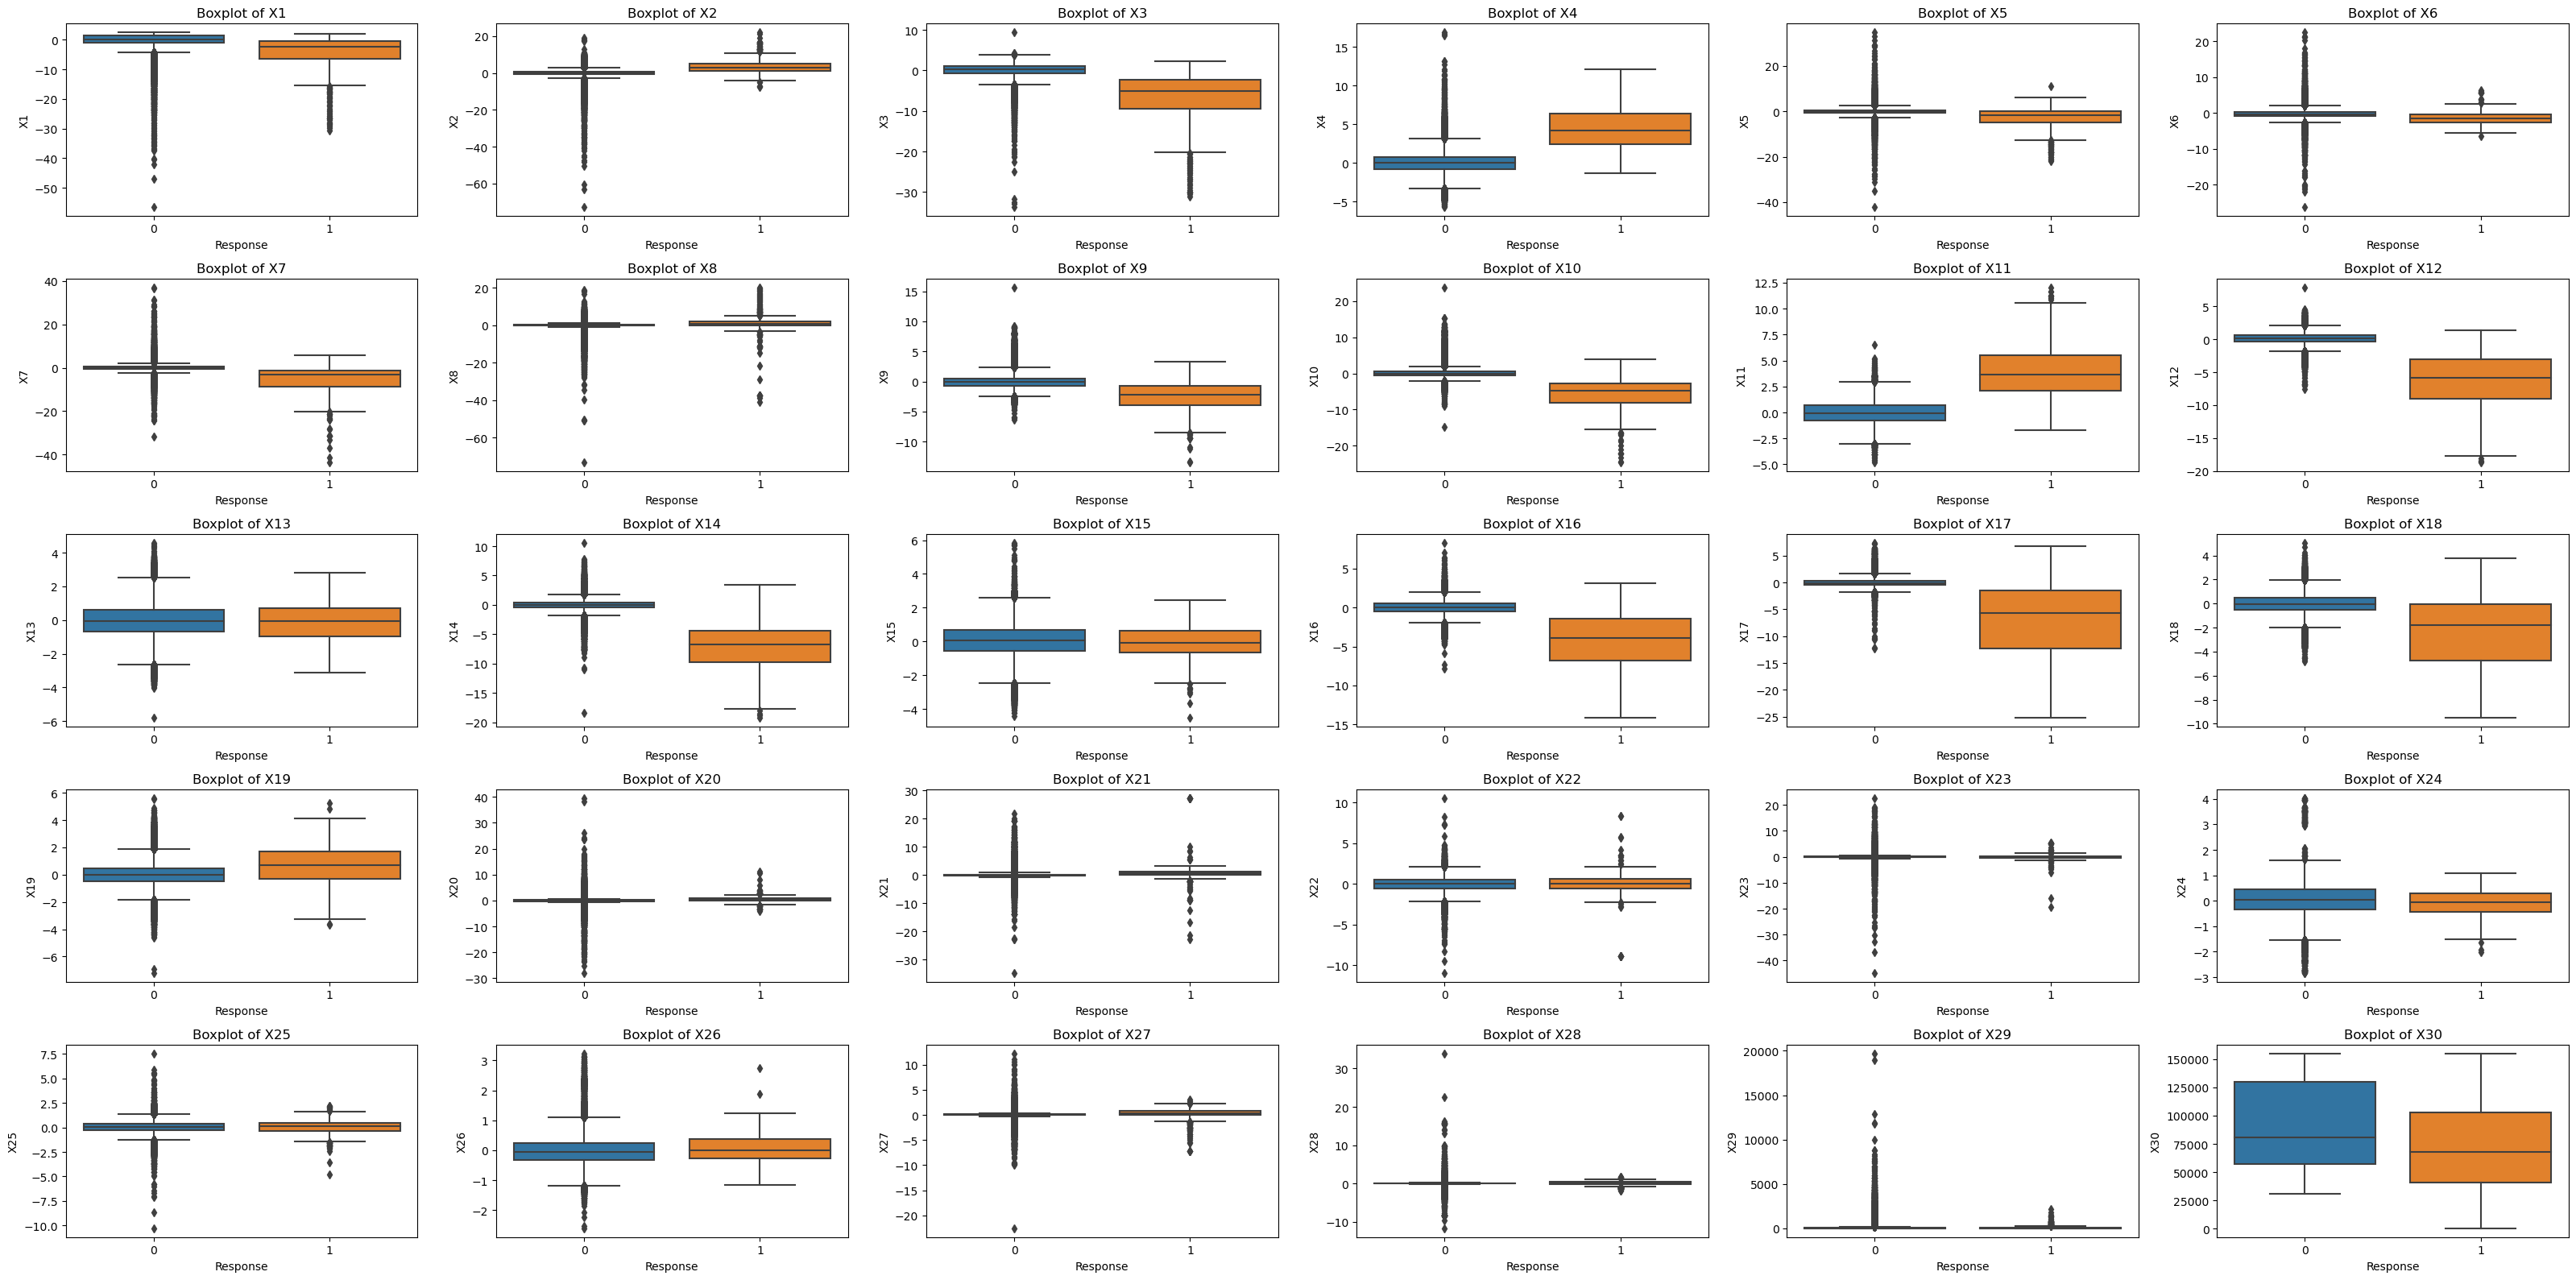

In [39]:
# visualize the distribution of each feature and identify potential outliers
plt.figure(figsize=(32, 16))

for i in range(1, 31):
    plt.subplot(5, 6, i) 
    sns.boxplot(x='Response', y=f'X{i}', data=df)
    plt.title(f'Boxplot of X{i}')

plt.tight_layout()
plt.show()

In [40]:
# Define features and target
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30']
target = 'Response'

# Random Forest Classifier

In [41]:
# Filling missing values with the mean
df.fillna(df.mean(), inplace=True)

In [42]:
# Checking for any remaining missing values in the dataset
if df.isnull().values.any():
    print("Dataset has missing values.")
    df.fillna(df.median(), inplace=True)
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [43]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,Response
count,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,...,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000,229999.000000
mean,-0.022017,-0.040445,0.040314,0.004992,-0.028667,0.011206,-0.008244,0.001987,-0.054923,0.015281,...,0.000985,-0.003658,-0.000191,0.012490,-0.001129,-0.001608,0.000303,92.480182,91385.717490,0.001991
std,1.981041,1.686610,1.500588,1.414776,1.382683,1.327046,1.235813,1.190187,1.081500,1.084933,...,0.721890,0.648419,0.607479,0.521052,0.481261,0.402937,0.339835,255.121978,38975.948814,0.044580
min,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,406.000000,0.000000
25%,-0.934086,-0.636101,-0.807290,-0.850301,-0.726131,-0.757130,-0.561966,-0.204283,-0.686620,-0.512475,...,-0.531499,-0.164198,-0.352550,-0.302345,-0.328766,-0.070670,-0.052170,6.000000,57080.000000,0.000000
50%,0.016827,0.045418,0.230522,-0.005837,-0.084836,-0.258294,0.028633,0.029755,-0.093819,-0.078922,...,0.011833,-0.015100,0.043630,0.037707,-0.060833,0.002232,0.013235,24.000000,81065.000000,0.000000
75%,1.291542,0.774800,1.050144,0.764439,0.586681,0.415379,0.556127,0.335270,0.535222,0.482643,...,0.521980,0.141534,0.436350,0.360543,0.242870,0.088687,0.077858,80.950000,129726.000000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,...,10.503090,22.528412,4.022866,7.519589,3.220178,12.152401,33.847808,19656.530000,154674.000000,1.000000


In [44]:
# Normalizing the dataset features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

In [45]:
df[features] = scaler.fit_transform(df[features])

In [46]:
# Splitting the dataset into training and testing sets, with 20% of the data for testing
X = df[features]
y = df['Response']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [57]:
# Importing necessary libraries for Balanced Random Forest
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize the Balanced Random Forest classifier
brf_classifier = BalancedRandomForestClassifier(n_estimators=150, random_state=42)

# Fit the model to the resampled training data
brf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred_brf = brf_classifier.predict(X_test)

# Calculating different performance metrics
accuracy_brf = accuracy_score(y_test, y_pred_brf)
recall_brf = recall_score(y_test, y_pred_brf)
precision_brf = precision_score(y_test, y_pred_brf)
f1_brf = f1_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf_classifier.predict_proba(X_test)[:, 1])

# Printing out the classification report and confusion matrix
classification_report_brf = classification_report(y_test, y_pred_brf)
conf_matrix_brf = confusion_matrix(y_test, y_pred_brf)


/Users/dhatrimulpuri/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/dhatrimulpuri/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


In [58]:
classification_report_brf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     45913\n           1       0.96      0.91      0.93        87\n\n    accuracy                           1.00     46000\n   macro avg       0.98      0.95      0.97     46000\nweighted avg       1.00      1.00      1.00     46000\n'

In [59]:
conf_matrix_brf

array([[45910,     3],
       [    8,    79]])

In [60]:
 accuracy_brf

0.9997608695652174

In [61]:
recall_brf

0.9080459770114943

In [62]:
precision_brf

0.9634146341463414

In [63]:
f1_brf

0.9349112426035503

In [64]:
roc_auc_brf

0.9843678611546927

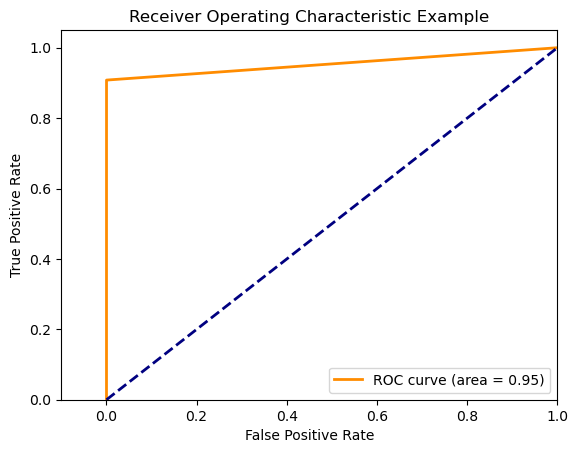

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate False Positive Rate and True Positive Rate for ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_brf)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()
